In [31]:
import numpy as np
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import datetime

ModuleNotFoundError: No module named 'datetime.datetime'; 'datetime' is not a package

In [17]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")
fig_dir=Path('/mnt/c/Users/fransjevanoors/surfdrive - Fransje van Oorschot@surfdrive.surf.nl/Fransje/global_SR/global_sr_paper/figures')

In [18]:
c_ids=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments_gswp-p_gleam-ep_gswp-t/sd/*.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-4] # remove .year extension
    c_ids.append(f)

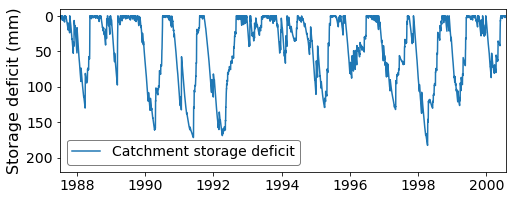

In [64]:
ix = 199
sd_fol = f'{work_dir}/output/sr_calculation/sd_catchments_gswp-p_gleam-ep_gswp-t/sd/'
sd = pd.read_csv(f'{sd_fol}/{c_ids[ix]}.csv',index_col=0)
sd.index = pd.to_datetime(sd.index)
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)
ax.plot(sd.index,sd.sd2,label='Catchment storage deficit')
ax.set_xlim(datetime.date(1987,7,1),datetime.date(2000,7,31))
ax.set_ylim(-220,10)
ax.set_ylabel('Storage deficit (mm)',size=16)
ax.set_yticks([-200,-150,-100,-50,0])
ax.set_yticklabels(['200','150','100','50','0'])
ax.tick_params(axis='both',labelsize=14)
legend = ax.legend(loc="lower left", edgecolor="grey",fontsize=14)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.1))
fig.savefig(f'{fig_dir}/sd_timeseries.png',bbox_inches='tight',dpi=200,transparent=True)